Task 1: Import the libraries

Linear Kernel Train Accuracy: 57.0000%
Linear Kernel Test Accuracy: 54.9020%
Polynomial Kernel Train Accuracy: 57.0000%
Polynomial Kernel Test Accuracy: 54.9020%
RBF Kernel Train Accuracy: 57.0000%
RBF Kernel Test Accuracy: 54.9020%
Sigmoid Kernel Train Accuracy: 51.5000%
Sigmoid Kernel Test Accuracy: 60.7843%


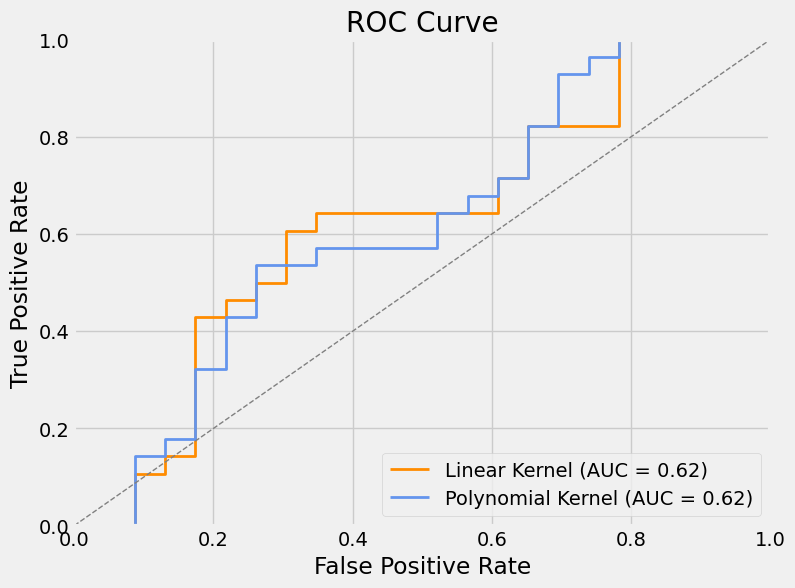


The best kernel is Sigmoid with Test Accuracy: 60.7843%


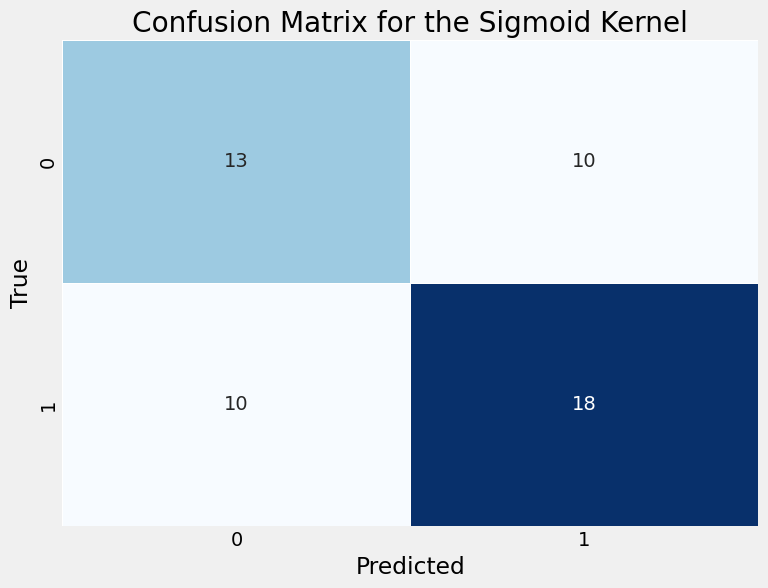

The best kernel is linear
Model with best kernel (linear) Test Accuracy: 54.9020%


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


Df = pd.read_csv('/content/SPY.csv')
Df= Df.dropna()
Df = Df.set_index(Df.Date)
Df = Df.drop(columns='Date')
Df.head()

# Predictor variables
Df['Open-Close'] = Df.Open - Df.Close
Df['High-Low'] = Df.High - Df.Low
X = Df[['Open-Close','High-Low']]
X.head()

# Target variables
y = np.where(Df['Close'].shift(-1) > Df['Close'],1,-1)

split_percentage = 0.8
split = int(split_percentage*len(Df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]


# Create and evaluate SVC models with different kernels
# Linear Kernel
svc_linear = SVC(kernel='linear').fit(X_train, y_train)
accuracy_linear_train = accuracy_score(y_train, svc_linear.predict(X_train))
accuracy_linear_test = accuracy_score(y_test, svc_linear.predict(X_test))
print('Linear Kernel Train Accuracy: {:.4f}%'.format(accuracy_linear_train*100))
print('Linear Kernel Test Accuracy: {:.4f}%'.format(accuracy_linear_test*100))

# Polynomial Kernel
svc_poly = SVC(kernel='poly').fit(X_train, y_train)
accuracy_poly_train = accuracy_score(y_train, svc_poly.predict(X_train))
accuracy_poly_test = accuracy_score(y_test, svc_poly.predict(X_test))
print('Polynomial Kernel Train Accuracy: {:.4f}%'.format(accuracy_poly_train*100))
print('Polynomial Kernel Test Accuracy: {:.4f}%'.format(accuracy_poly_test*100))

# Radial Basis Function (RBF) Kernel
svc_rbf = SVC(kernel='rbf').fit(X_train, y_train)
accuracy_rbf_train = accuracy_score(y_train, svc_rbf.predict(X_train))
accuracy_rbf_test = accuracy_score(y_test, svc_rbf.predict(X_test))
print('RBF Kernel Train Accuracy: {:.4f}%'.format(accuracy_rbf_train*100))
print('RBF Kernel Test Accuracy: {:.4f}%'.format(accuracy_rbf_test*100))

# Sigmoid Kernel
svc_sigmoid = SVC(kernel='sigmoid').fit(X_train, y_train)
accuracy_sigmoid_train = accuracy_score(y_train, svc_sigmoid.predict(X_train))
accuracy_sigmoid_test = accuracy_score(y_test, svc_sigmoid.predict(X_test))
print('Sigmoid Kernel Train Accuracy: {:.4f}%'.format(accuracy_sigmoid_train*100))
print('Sigmoid Kernel Test Accuracy: {:.4f}%'.format(accuracy_sigmoid_test*100))


# Predict probabilities for both models
y_score_linear = svc_linear.decision_function(X_test)
y_score_poly = svc_poly.decision_function(X_test)

# Calculate ROC curve and AUC for the linear kernel
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_score_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)

# Calculate ROC curve and AUC for the polynomial kernel
fpr_poly, tpr_poly, _ = roc_curve(y_test, y_score_poly)
roc_auc_poly = auc(fpr_poly, tpr_poly)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, color='darkorange', lw=2, label=f'Linear Kernel (AUC = {roc_auc_linear:.2f})')
plt.plot(fpr_poly, tpr_poly, color='cornflowerblue', lw=2, label=f'Polynomial Kernel (AUC = {roc_auc_poly:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Create a dictionary to store accuracy values for each kernel
kernel_accuracies = {
    "Linear": accuracy_linear_test,
    "Polynomial": accuracy_poly_test,
    "RBF": accuracy_rbf_test,
    "Sigmoid": accuracy_sigmoid_test
}

# Find the kernel with the highest accuracy
best_kernel = max(kernel_accuracies, key=kernel_accuracies.get)
best_accuracy = kernel_accuracies[best_kernel]

print(f'\nThe best kernel is {best_kernel} with Test Accuracy: {best_accuracy*100:.4f}%')

# Create the SVC model with the best kernel
if best_kernel == "Linear":
    best_svc = svc_linear
elif best_kernel == "Polynomial":
    best_svc = svc_poly
elif best_kernel == "RBF":
    best_svc = svc_rbf
else:
    best_svc = svc_sigmoid

# Make predictions on the test data
y_pred_best = best_svc.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for the {best_kernel} Kernel')
plt.show()


# Define a list of kernel options to tune
kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']

# Create a parameter grid with different kernel options
param_grid = {'kernel': kernel_options}

# Create a GridSearchCV object to find the best kernel
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best kernel from the grid search
best_kernel = grid_search.best_params_['kernel']
print(f'The best kernel is {best_kernel}')

# Create an SVC model with the best kernel
best_svc = SVC(kernel=best_kernel).fit(X_train, y_train)

# Evaluate the model with the best kernel
accuracy_best = accuracy_score(y_test, best_svc.predict(X_test))
print(f'Model with best kernel ({best_kernel}) Test Accuracy: {accuracy_best*100:.4f}%')

In [ ]:
Df = pd.read_csv('/content/SPY.csv')
Df= Df.dropna()
Df = Df.set_index(Df.Date)
Df = Df.drop(columns='Date')
Df.head()


,Open,High,Low,Close,Volume
Date,,,,,
03-01-2017,215.6950,216.4522,214.5867,215.8867,91366522
04-01-2017,216.2509,217.3340,216.2413,217.1710,78744433
05-01-2017,216.8739,217.1710,216.1167,216.9985,78379012
06-01-2017,217.1231,218.2924,216.5193,217.7749,71559922
09-01-2017,217.4873,217.6408,217.0141,217.0560,46939676


In [ ]:
# Predictor variables
Df['Open-Close'] = Df.Open - Df.Close
Df['High-Low'] = Df.High - Df.Low
X = Df[['Open-Close','High-Low']]
X.head()

,Open-Close,High-Low
Date,,
03-01-2017,-0.1917,1.8655
04-01-2017,-0.9201,1.0927
05-01-2017,-0.1246,1.0543
06-01-2017,-0.6518,1.7731
09-01-2017,0.4313,0.6267


In [ ]:
# Target variables
y = np.where(Df['Close'].shift(-1) > Df['Close'],1,-1)

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(Df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [ ]:
# train and test accuracy
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 57.00%
Test Accuracy: 54.90%


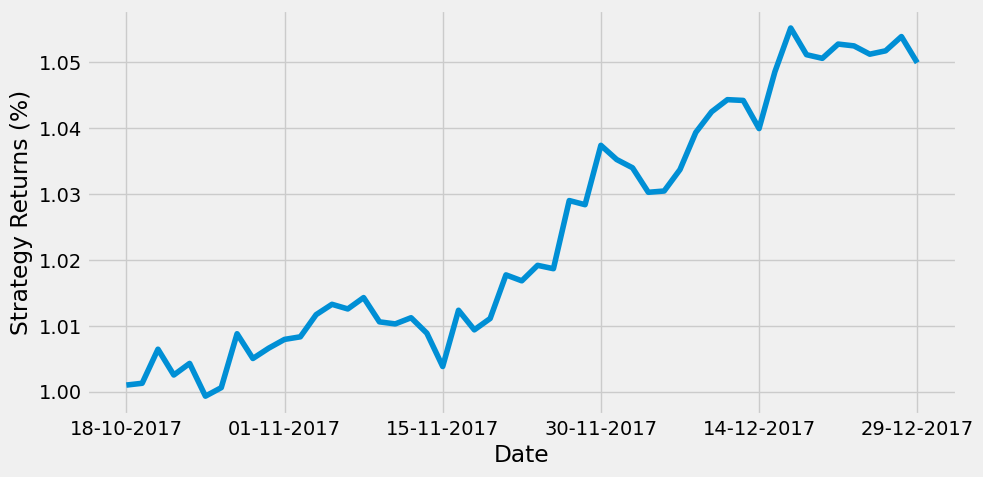

In [ ]:
# Predicted Signal
Df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
Df['Return'] = Df.Close.pct_change()

# Calculate strategy returns
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal

# Calculate geometric returns
geometric_returns = (Df.Strategy_Return.iloc[split:]+1).cumprod()

# Plot geometric returns
geometric_returns.plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()